<a href="https://colab.research.google.com/github/annisapraditha/tugaspraktikum_ML6/blob/main/(versi_3)_Kegiatan_Modul_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soal Praktikum Model Deployment**

## Kegiatan 1 **(Kelompok)** 
100 poin

**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data dan progress pengerjaan tugas kelompok harus berada dalam github repository sebelum praktikum dimulai
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* **Tidak diperbolehkan berganti dataset atau jurnal rujukan**
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Pembagian tugas yang jelas untuk masing - masing angota kelompok 
* Progress pengerjaan tugas kelompok
* Problem solving masing - masing anggota terhadap kendala yang dialami
* Pemahaman masing - masing anggota tim terhadap tugas yang dikerjakan
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)

**Pre-requirement** 
1. Membuat virtual environment python atau anaconda python
2. Menjalankan virtual environment dan menginstall seluruh package yang digunakan dalam kegiatan ini pada virtual environment.
3. Membuat file `requirement.txt` yang berisi seluruh paket package digunakan dalam kegiatan bagian B.
4. Deployment menggunakan flask micro framework dari python
5. Project berbasis python file berekstensi `.py` bukan file notebook `.ipynb`

**Kriteria wajib untuk deploy model**
1. Menggunakan model yang telah dilatih dan disimpan dalam format `.h5`,`.json` dan `.tflite` pada kegiatan kelompok di modul - modul sebelumnya.
2. Memiliki fitur upload data untuk diprediksi oleh model
3. Memiliki menu **pilih model** untuk memilih model yang ingin digunakan untuk memprediksi gambar.
4. Memiliki fitur komparasi model (fitur untuk membandingankan kinerja dari beberapa model dalam memprediksi data baru)
5. Memiliki fitur **pilih gambar** yang terdiri dari 25 gambar acak untuk diprediksi. Masing-masing kelas dari dataset anda harus terwakili oleh minimal 1 buah gambar.
6. Menampilkan hasil akurasi prediksi, lama waktu prediksi, input gambar yang dipresiksi dan label gambar yang diprediksi.
7. Menyimpan seluruh progress dan hasil pengerjaan modul dalam repository `github`.

In [1]:
# Tulis Program Di Desktop Anda (Bukan Disini)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/RESEARCH CENTER/DATASETS/Modul 6"

In [3]:
ls

drive/  sample_data/


In [4]:
%cd /content/drive/MyDrive/RESEARCH CENTER/DATASETS/Modul 6

/content/drive/MyDrive/RESEARCH CENTER/DATASETS/Modul 6


In [13]:
!kaggle datasets download -d wanderdust/skin-lesion-analysis-toward-melanoma-detection

100% 11.3G/11.3G [04:05<00:00, 115MB/s]
100% 11.3G/11.3G [04:05<00:00, 49.4MB/s]


In [5]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/RESEARCH CENTER/DATASETS/Modul 6/skin-lesion-analysis-toward-melanoma-detection.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [18]:
%cd /tmp/skin-lesions

/tmp/skin-lesions


In [19]:
%ls

test/  train/  valid/


In [20]:
import os
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
train_dir = 'train'
test_dir = 'test'
valid_dir = 'valid'

In [22]:
import cv2
import numpy as np
import os

test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, ((224,224)))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [23]:
import cv2
import numpy as np
import os

train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, ((224,224)))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [24]:
import cv2
import numpy as np
import os

valid_data = []
valid_label = []
for r, d, f in os.walk(valid_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, ((224,224)))
            valid_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            valid_label.append(label)

valid_data = np.array(valid_data)
valid_label = np.array(valid_label)

In [25]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)
print("Valid Data = ", valid_data.shape)
print("Valid Label = ", valid_label.shape)

Train Data =  (2000, 224, 224, 3)
Train Label =  (2000,)
Test Data =  (600, 224, 224, 3)
Test Label =  (600,)
Valid Data =  (150, 224, 224, 3)
Valid Label =  (150,)


In [26]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", test_data[0][0][0])

x_test = test_data.astype('float32') / 255.0
x_train = train_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_test[0][0][0])

Data sebelum di-normalisasi  [228 224 232]
Data setelah di-normalisasi  [0.89411765 0.8784314  0.9098039 ]


In [27]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", test_label[100:110])

lb = LabelEncoder()
y_test = lb.fit_transform(test_label)
y_train = lb.fit_transform(train_label)

print("Label setelah di-encoder ", y_test[100:110])

Label sebelum di-encoder  ['nevus' 'nevus' 'nevus' 'nevus' 'nevus' 'nevus' 'nevus' 'nevus' 'nevus'
 'nevus']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [29]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 2000 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [30]:
train_generator.class_indices

{'melanoma': 0, 'nevus': 1, 'seborrheic_keratosis': 2}

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2, 
                        zoom_range=0.8, horizontal_flip=True,
                        fill_mode="nearest")

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet, ResNet50V2

In [46]:
import tensorflow as tf
from keras import layers, Model
from keras.layers import InputLayer, Activation, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, Concatenate, Input, GlobalAveragePooling2D
from keras.models import Sequential

model_1 = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
model_2 = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [47]:
for layer in model_1.layers:
  layer.trainable=False

for layer in model_2.layers:
  layer.trainable=False

model 1

In [46]:
input = Input(shape=(224,224,3))
model_tf = model_1(input)
model_tf1 = model_2(input)
net_1 = Concatenate()([model_tf, model_tf1])
net_1 = Flatten()(net_1)
net_1 = Dense(128, activation='relu')(net_1)
net_1 = Dense(64, activation='relu')(net_1)
net_1 = Dense(3, activation='softmax')(net_1)

model_1 = Model(inputs=input, outputs=net_1)
model_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 mobilenet_1.00_224 (Functional  (None, 7, 7, 1024)  3228864     ['input_7[0][0]']                
 )                                                                                                
                                                                                                  
 mobilenetv2_1.00_224 (Function  (None, 7, 7, 1280)  2257984     ['input_7[0][0]']                
 al)                                                                                        

In [32]:
from tensorflow.keras.optimizers import Adam, RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [33]:
import time

start=time.time()
history = model_1.fit(train_generator,
          epochs=100,
          steps_per_epoch=8,
          validation_data=val_generator,
          verbose=1)

Epoch 1/100
8/8 [==============================] - 102s 12s/step - loss: 2.0843 - accuracy: 0.5352 - val_loss: 2.2264 - val_accuracy: 0.4600
Epoch 2/100
8/8 [==============================] - 77s 10s/step - loss: 1.0563 - accuracy: 0.6602 - val_loss: 1.0664 - val_accuracy: 0.5333
Epoch 3/100
8/8 [==============================] - 80s 11s/step - loss: 0.9573 - accuracy: 0.6602 - val_loss: 1.0651 - val_accuracy: 0.5667
Epoch 4/100
8/8 [==============================] - 84s 11s/step - loss: 0.8537 - accuracy: 0.6836 - val_loss: 0.8451 - val_accuracy: 0.6600
Epoch 5/100
8/8 [==============================] - 76s 10s/step - loss: 0.6928 - accuracy: 0.7227 - val_loss: 0.8871 - val_accuracy: 0.6400
Epoch 6/100
8/8 [==============================] - 75s 10s/step - loss: 0.5515 - accuracy: 0.7969 - val_loss: 0.7776 - val_accuracy: 0.6667
Epoch 7/100
8/8 [==============================] - 78s 11s/step - loss: 0.6105 - accuracy: 0.7266 - val_loss: 0.8264 - val_accuracy: 0.6733
Epoch 8/100
8/8 [==

In [34]:
# TULIS CODE UNTUK MENCETAK LAMA TRAINING TIME DISINI
print("waktu = ", time.time() - start, "detik")

waktu =  8412.134818553925 detik


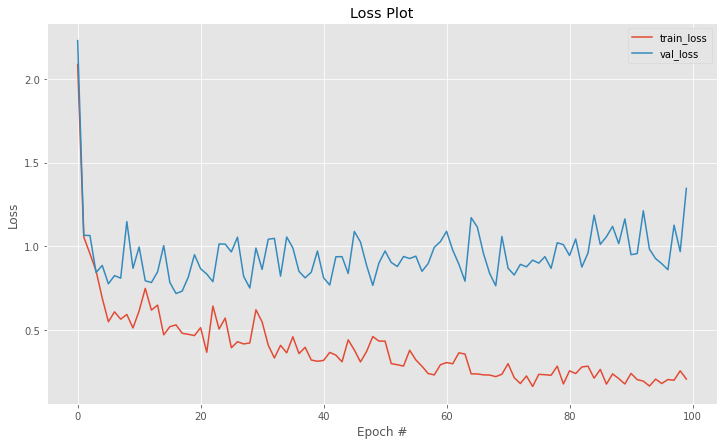

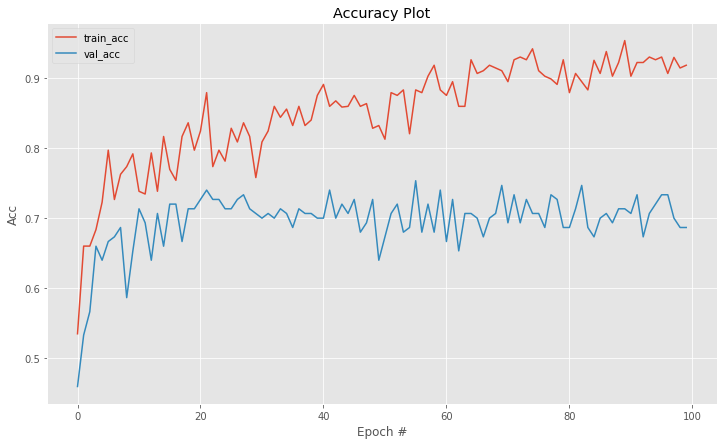

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [36]:
score = model_1.evaluate(test_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

19/19 [==============================] - 247s 13s/step - loss: 1.3136 - accuracy: 0.6783
Loss: 1.31
Accuracy: 0.68


In [ ]:
#from sklearn.metrics import classification_report

#pred = model_1.predict(train_generator)
#labels = (pred > 0.5).astype(np.int)

#print(classification_report(val_generator, labels))

In [37]:
from keras.models import save_model
model_1 = save_model(model_1,'MobileNet.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [38]:
tflite_model = tf.keras.models.load_model('MobileNet.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
tflite_save = converter.convert()
open("MobileNet.tflite", "wb").write(tflite_save)

INFO:tensorflow:Assets written to: /tmp/tmp_yhhgyc3/assets


79506952

In [48]:
model_json = model_1.to_json()
with open("MobileNet.json", "w") as json_file:
    json_file.write(model_json)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


model 2

In [63]:
class Combin1:
  def build(model_1,classes):

    input = Input(shape=(224,224,3))
    headModel = model_1.output
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(512, activation='relu')(headModel)
    headModel = Dense(64, activation='relu')(headModel)
    headModel = Dense(3, activation='softmax')(headModel)
    return headModel

In [64]:
headModel2 = Combin1.build(model_2, 1)
model2 =Model(inputs=model_2.input, outputs=headModel2)

In [65]:
for layer in model_2.layers:
  layer.trainable = False

In [66]:
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [67]:
from tensorflow.keras.optimizers import RMSprop, Adam
model2.compile(
    optimizer=Adam(lr=0.00001, decay= 0.001/20),
    loss ='binary_crossentropy',
    metrics =['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [68]:
test=model2.fit(
    train_generator,
     validation_data = val_generator,
     epochs=100,
     steps_per_epoch = 8,
     batch_size=32,

)

Epoch 1/100
8/8 [==============================] - 144s 18s/step - loss: 0.6628 - accuracy: 0.6094 - val_loss: 1.0516 - val_accuracy: 0.5200
Epoch 2/100
8/8 [==============================] - 140s 18s/step - loss: 0.6625 - accuracy: 0.6641 - val_loss: 0.6445 - val_accuracy: 0.5200
Epoch 3/100
8/8 [==============================] - 132s 17s/step - loss: 0.4889 - accuracy: 0.7125 - val_loss: 0.5596 - val_accuracy: 0.5667
Epoch 4/100
8/8 [==============================] - 141s 18s/step - loss: 0.4777 - accuracy: 0.6914 - val_loss: 0.5733 - val_accuracy: 0.5400
Epoch 5/100
8/8 [==============================] - 138s 18s/step - loss: 0.3924 - accuracy: 0.7539 - val_loss: 0.6160 - val_accuracy: 0.5133
Epoch 6/100
8/8 [==============================] - 138s 18s/step - loss: 0.4990 - accuracy: 0.6641 - val_loss: 0.5703 - val_accuracy: 0.5533
Epoch 7/100
8/8 [==============================] - 135s 18s/step - loss: 0.4162 - accuracy: 0.7266 - val_loss: 0.5146 - val_accuracy: 0.5800
Epoch 8/100
8

In [69]:
# TULIS CODE UNTUK MENCETAK LAMA TRAINING TIME DISINI
import time
start=time.time()
print("waktu = ", time.time() - start, "detik")

waktu =  0.00046133995056152344 detik


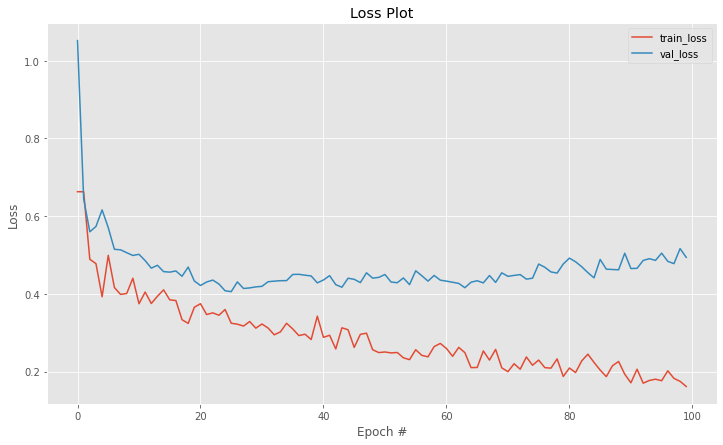

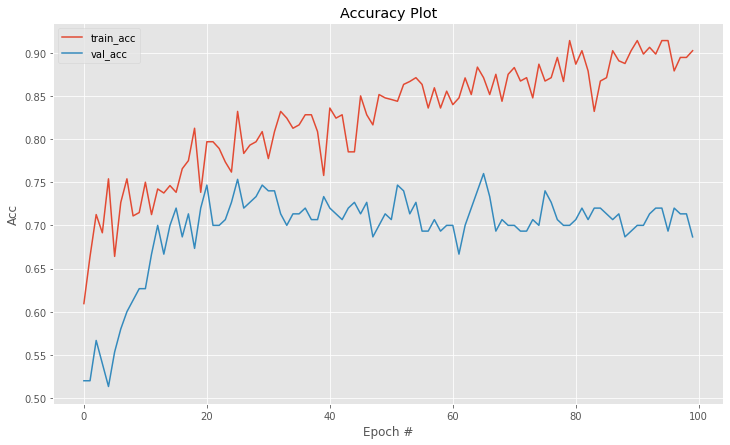

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(test.history["loss"], label="train_loss")
plt.plot(test.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(test.history["accuracy"], label="train_acc")
plt.plot(test.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [72]:
score = model2.evaluate(test_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

19/19 [==============================] - 324s 17s/step - loss: 0.4743 - accuracy: 0.7050
Loss: 0.47
Accuracy: 0.70


In [ ]:
#from sklearn.metrics import classification_report

#pred = model2.predict(x_train)
#labels = (pred > 0.5).astype(np.int)

#print(classification_report(y_train, labels))

In [80]:
from keras.models import save_model
model2 = save_model(model_2,'ResNet50V2.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [81]:
tflite_model2 = tf.keras.models.load_model('ResNet50V2.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model2)
tflite_save = converter.convert()
open("ResNet50V2.tflite", "wb").write(tflite_save)

INFO:tensorflow:Assets written to: /tmp/tmpu66avmap/assets


94093932

In [84]:
model2_json = model_2.to_json()
with open("ResNet50V2.json", "w") as json_file:
    json_file.write(model2_json)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
